In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

In [63]:
df = pd.read_csv('../data/train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [64]:
df.drop(columns=['Unnamed: 0', 'New_Price'], inplace=True)

# Name

In [65]:
df.Name.sample(10)

3044                             Hyundai Santro Xing GL
2675                            Maruti Wagon R VXi BSII
1963                Mercedes-Benz GLA Class 200 d Sport
2083                        BMW X3 xDrive20d Expedition
3449               Volkswagen Polo Petrol Highline 1.2L
1769                                   Maruti Swift VDI
2299                       BMW 1 Series 118d Sport Line
2188                                    Maruti Ritz VDi
2823    Volkswagen Jetta 2013-2015 2.0L TDI Highline AT
2833                             BMW X3 xDrive20d xLine
Name: Name, dtype: object

`There is a pattern in the 'Name' column. The brand name appears first followed by the model name.
 We can extract them into separate columns.`

In [66]:
df.Name.str.contains('Land Rover').sum()

np.int64(60)

In [67]:
df.Name[df.Name.str.contains('Land Rover')].sample(5)

5530            Land Rover Freelander 2 SE
749           Land Rover Range Rover 3.0 D
1204           Land Rover Freelander 2 HSE
521     Land Rover Range Rover HSE Dynamic
1259         Land Rover Freelander 2 TD4 S
Name: Name, dtype: object

In [68]:
sample_car = df.loc[10, 'Name']
sample_car.split(' ')[0]  # Brand

'Maruti'

In [69]:
def get_brand(name):
    if name.startswith('Land Rover'):
        return 'Land Rover'
    return name.split(' ')[0]

sample_car = df.loc[1505, 'Name']
get_brand(sample_car)

'Land Rover'

In [70]:
df['Brand'] = df.Name.apply(get_brand)

In [71]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


In [72]:
df[df.Name.str.contains('Land Rover')].sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
4630,Land Rover Freelander 2 HSE,Mumbai,2011,82000,Diesel,Automatic,Second,12.35 kmpl,2179 CC,187.74 bhp,5.0,13.90,Land Rover
5038,Land Rover Discovery Sport TD4 HSE 7S,Coimbatore,2019,24013,Diesel,Automatic,First,12.81 kmpl,1999 CC,148.31 bhp,7.0,56.14,Land Rover
1988,Land Rover Freelander 2 SE,Mumbai,2012,34000,Diesel,Automatic,First,12.39 kmpl,2179 CC,147.51 bhp,5.0,19.25,Land Rover
1259,Land Rover Freelander 2 TD4 S,Bangalore,2010,125000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,11.00,Land Rover
5539,Land Rover Discovery Sport SD4 HSE Luxury,Delhi,2016,70000,Diesel,Automatic,First,12.97 kmpl,2179 CC,187.7 bhp,5.0,35.00,Land Rover


In [73]:
import numpy as np
for i in np.random.randint(0, len(df), 5):
    sample_car = df.loc[i, 'Name']
    print(sample_car.split(' ')[1])   # MODEL

Swift
Vento
Fiesta
i10
Scorpio


In [74]:
sample_car = df[df.Name.str.contains('Land Rover')].reset_index().loc[50, 'Name']
print(sample_car)

Land Rover Discovery Sport TD4 HSE 7S


In [75]:
def get_model(name):
    if name.startswith('Land Rover Range Rover'):
        return 'Range Rover'
    elif name.startswith('Land Rover'):
        return name.split(' ')[2]
    else:
        return name.split(' ')[1]
    
df['Model'] = df.Name.apply(get_model)

In [76]:
df[df.Name.str.contains('Land Rover')].sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
4869,Land Rover Range Rover 3.6 TDV8 Vogue SE,Coimbatore,2012,84384,Diesel,Automatic,First,10.2 kmpl,4367 CC,308 bhp,7.0,52.54,Land Rover,Range Rover
1988,Land Rover Freelander 2 SE,Mumbai,2012,34000,Diesel,Automatic,First,12.39 kmpl,2179 CC,147.51 bhp,5.0,19.25,Land Rover,Freelander
4247,Land Rover Freelander 2 SE,Ahmedabad,2012,75000,Diesel,Automatic,Second,12.39 kmpl,2179 CC,147.51 bhp,5.0,17.50,Land Rover,Freelander
4925,Land Rover Discovery Sport TD4 S,Delhi,2017,22000,Diesel,Automatic,First,12.83 kmpl,2179 CC,147.5 bhp,5.0,35.00,Land Rover,Discovery
311,Land Rover Range Rover HSE Dynamic,Delhi,2017,44000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,44.00,Land Rover,Range Rover


In [77]:
df.describe(include='O')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Brand,Model
count,6019,6019,6019,6019,6019,6017,5983,5983,6019,6019
unique,1876,11,5,2,4,442,146,372,31,214
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,Maruti,Swift
freq,49,790,3205,4299,4929,172,606,235,1211,353


In [78]:
df.drop(columns=['Name'], inplace=True)

# Kilometers_Driven

In [79]:
px.histogram(df, x='Kilometers_Driven', marginal='box', title='Km Distribution')

In [80]:
df[df.Kilometers_Driven == df.Kilometers_Driven.max()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
2328,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,65.0,BMW,X5


In [81]:
km_outlier = df[df.Kilometers_Driven == df.Kilometers_Driven.max()].index
df.drop(index=km_outlier, inplace=True)

In [82]:
px.histogram(df, x='Kilometers_Driven', marginal='box', title='Km Distribution')

# Fuel_Type

In [83]:
df.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [84]:
df[df.Fuel_Type == 'Electric']

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
4446,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,Mahindra,E
4904,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,Toyota,Prius


In [85]:
df.isna().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Brand                 0
Model                 0
dtype: int64

<Axes: >

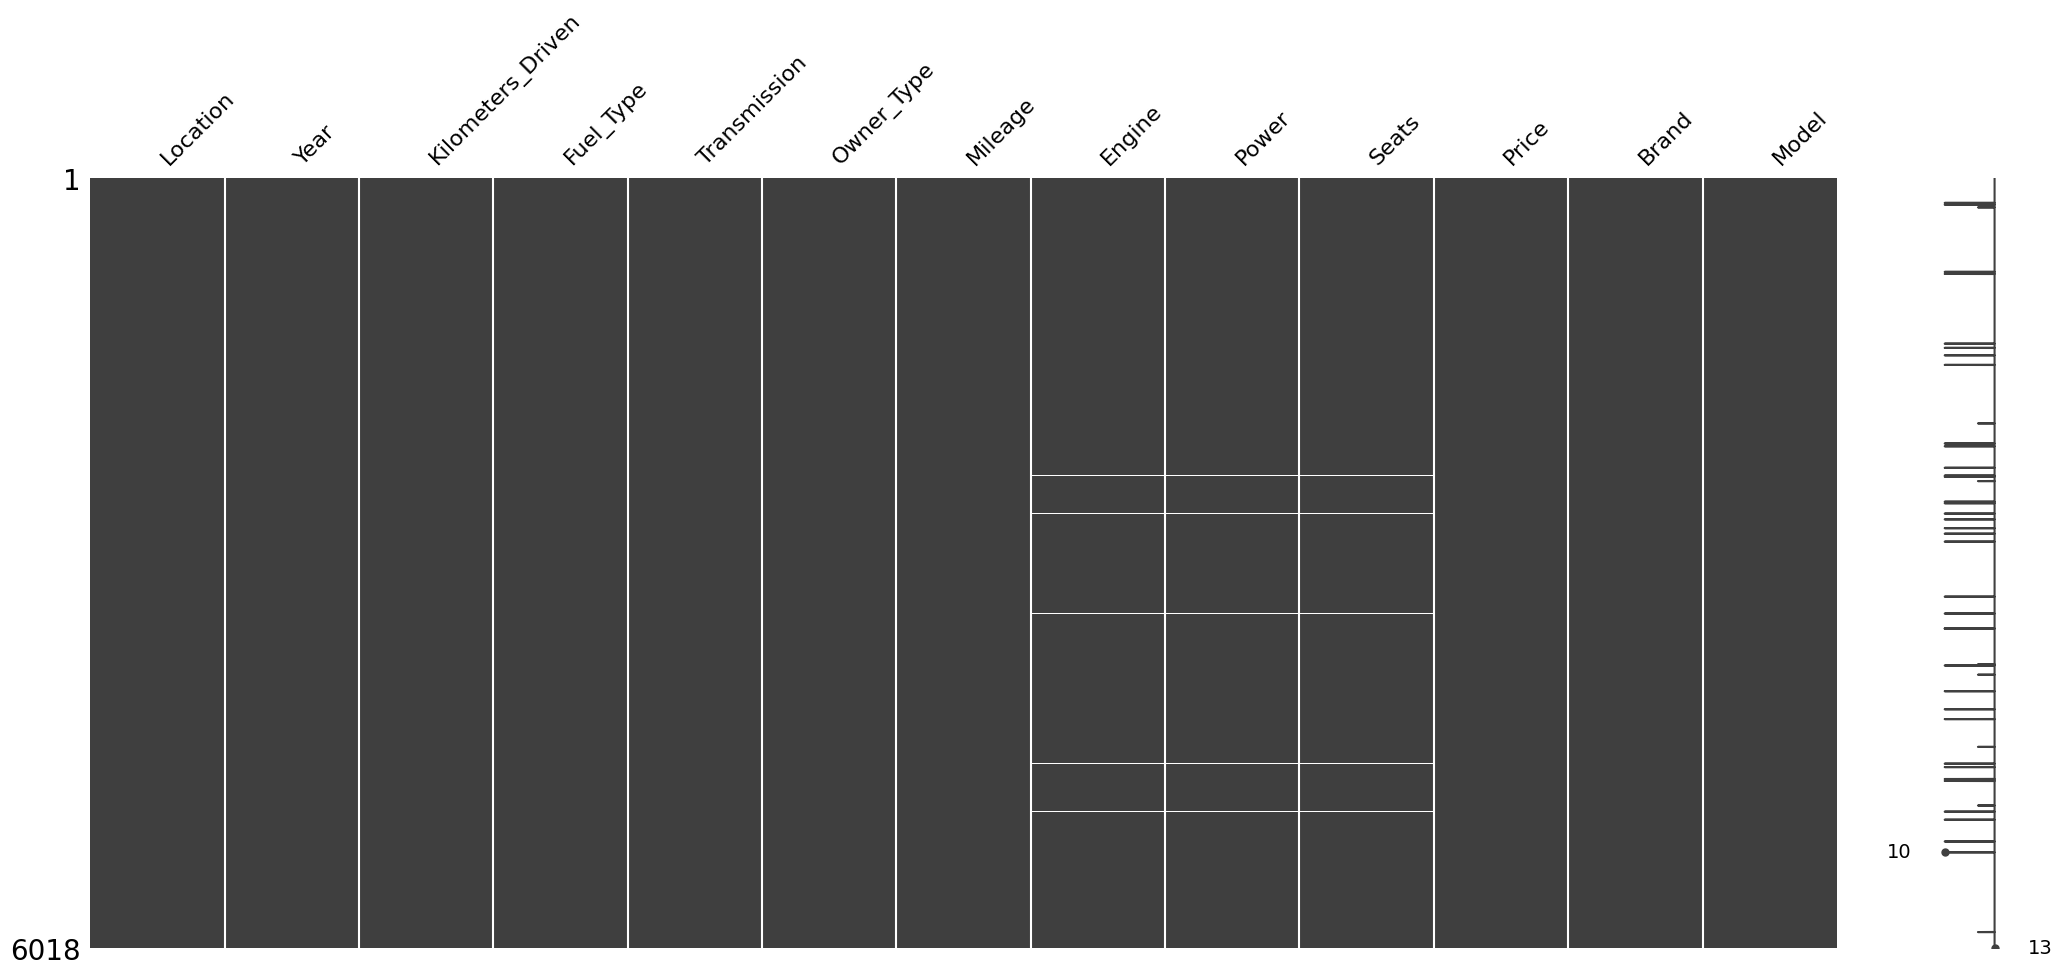

In [86]:
import missingno as msno

msno.matrix(df)

<Axes: >

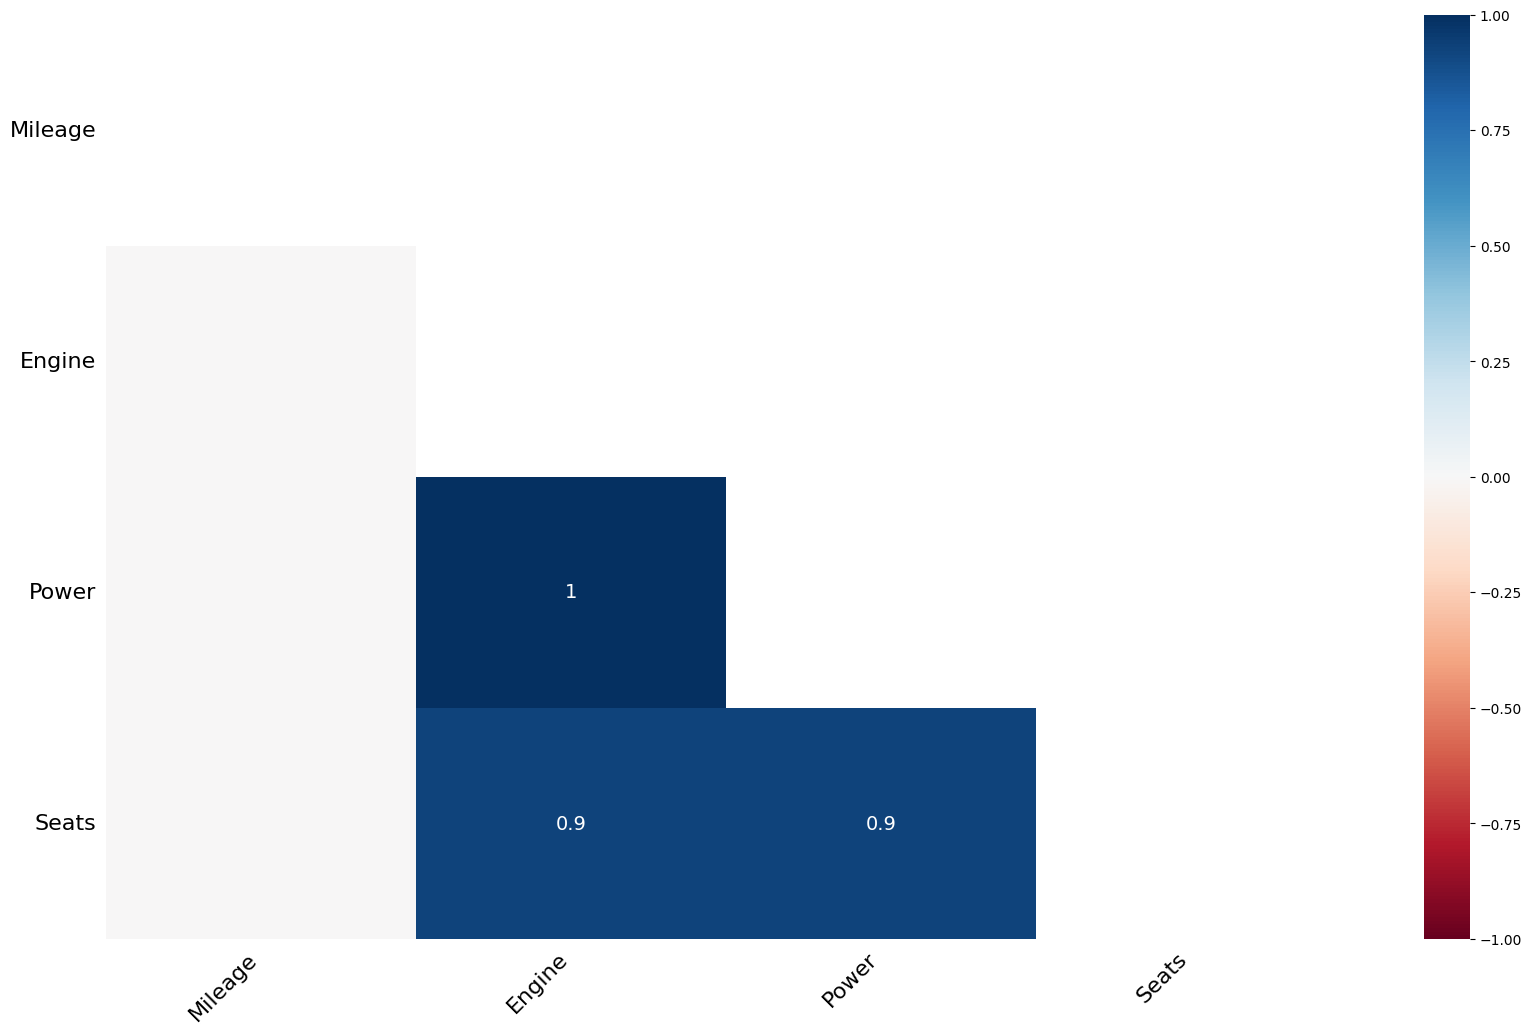

In [87]:
msno.heatmap(df)

In [88]:
df[df.Power.isna()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
194,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95,Honda,City
208,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11,Maruti,Swift
733,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75,Maruti,Swift
749,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50,Land Rover,Range Rover
1294,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20,Honda,City
1327,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80,Maruti,Swift
1385,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50,Honda,City
1460,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88,Land Rover,Range Rover
2074,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,3.15,Maruti,Swift
2096,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,1.93,Hyundai,Santro


* Mileage is missing in case of "Electric" cars.  
👉 Impute EV mileage as 0 and add a mileage_missing flag.

* Engine, Power and Seats are mostly missing together.  
👉 We will impute using median and add missing indicator.



# Mileage

In [89]:
df.Mileage.str.split(' ').str[1].unique()

array(['km/kg', 'kmpl', nan], dtype=object)

In [90]:
df.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [91]:
# fuel densities (kg/L)
fuel_densities = {
    "CNG": 0.43,
    "Diesel": 0.832,
    "Petrol": 0.74,
    "LPG": 0.54,
    "Electric": 0
}

def convert_to_kmpl(row):
    if not pd.isna(row['Mileage']):
        fuel = row['Fuel_Type']
        mileage = float(row['Mileage'].split()[0])
        unit = row['Mileage'].split()[1] 
        
        if mileage == 0:
            return np.nan

        if unit == 'km/kg':
            return mileage * fuel_densities[fuel]
        else:
            return mileage

# Apply conversion to DataFrame
df['Mileage'] = df.apply(convert_to_kmpl, axis=1)

In [92]:
df['Mileage'].describe()

count    5948.000000
mean       18.191253
std         4.155043
min         5.676000
25%        15.100000
50%        18.120000
75%        21.030000
max        28.400000
Name: Mileage, dtype: float64

# Engine

In [93]:
df.Engine.str.split(' ').str[1].unique()

array(['CC', nan], dtype=object)

In [94]:
def get_engine(engine):
    if not pd.isna(engine):
        return float(engine.split(' ')[0]) 

df['Engine'] = df['Engine'].apply(get_engine)

# Power

In [95]:
df.Power.str.split(' ').str[1].unique()

array(['bhp', nan], dtype=object)

In [96]:
df.Power.sample(10)

894       120 bhp
1903       66 bhp
712       258 bhp
1622       74 bhp
5739     73.9 bhp
3527     88.7 bhp
1288    207.8 bhp
4735      140 bhp
4010     66.1 bhp
380     117.3 bhp
Name: Power, dtype: object

In [97]:
def get_power(power):
    try:
        return float(power.split(' ')[0])
    except:
        return np.nan

df['Power'] = df['Power'].apply(get_power)

In [98]:
df.isna().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               70
Engine                36
Power                143
Seats                 42
Price                  0
Brand                  0
Model                  0
dtype: int64

# Seats

In [99]:
# Remove zeros in Seats
df[df.Seats == 0].shape

(1, 13)

In [100]:
df = df[df.Seats != 0]

In [101]:
df.Seats.value_counts(normalize=True) * 100

Seats
5.0     83.899582
7.0     11.280335
8.0      2.242678
4.0      1.656904
6.0      0.518828
2.0      0.267782
10.0     0.083682
9.0      0.050209
Name: proportion, dtype: float64

# Price

In [102]:
df[df.Price > 100]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
4079,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,160.0,Land Rover,Range Rover
5781,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,120.0,Lamborghini,Gallardo


In [103]:
# Remove outliers Where Price > 100
df = df[df.Price <= 100]

# Some Analysis

In [104]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,11.438,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.670,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.0,140.80,5.0,17.74,Audi,A4


In [105]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6015.000000,6015.000000,5945.000000,5979.000000,5873.000000,5973.000000,6015.000000
mean,2013.357606,57670.791521,18.195348,1619.954842,113.128200,5.280261,9.425423
std,3.269967,37870.190126,4.151598,598.895895,53.507006,0.805087,10.905359
min,1998.000000,171.000000,5.676000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,34000.000000,15.150000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,53000.000000,18.120000,1493.000000,97.700000,5.000000,5.630000
75%,2016.000000,73000.000000,21.030000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,775000.000000,28.400000,5998.000000,552.000000,10.000000,100.000000


In [106]:
df.describe(include='O')

,Location,Fuel_Type,Transmission,Owner_Type,Brand,Model
count,6015,6015,6015,6015,6015,6015
unique,11,5,2,4,30,213
top,Mumbai,Diesel,Manual,First,Maruti,Swift
freq,790,3203,4299,4926,1211,353


In [107]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    fig = px.histogram(df, x=col, marginal='box', title=f'Distribution of {col}', nbins=30)
    fig.show()

In [108]:
df.shape

(6015, 13)

In [109]:
df.isna().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               70
Engine                36
Power                142
Seats                 42
Price                  0
Brand                  0
Model                  0
dtype: int64

<Axes: >

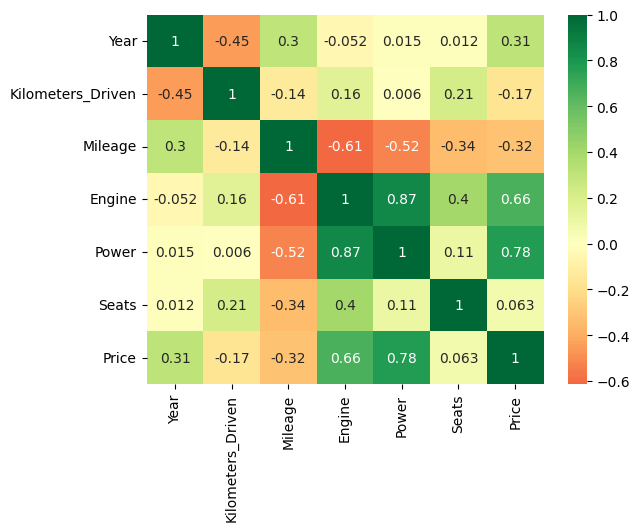

In [110]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn', center=0)

In [111]:
asc_num_features = df.corr(numeric_only=True)['Price'].sort_values(ascending=False)
asc_num_features 

Price                1.000000
Power                0.775852
Engine               0.660987
Year                 0.311195
Seats                0.062727
Kilometers_Driven   -0.168420
Mileage             -0.315347
Name: Price, dtype: float64

In [112]:
px.bar(asc_num_features, width=600, category_orders={'index':asc_num_features.index}, orientation='h')

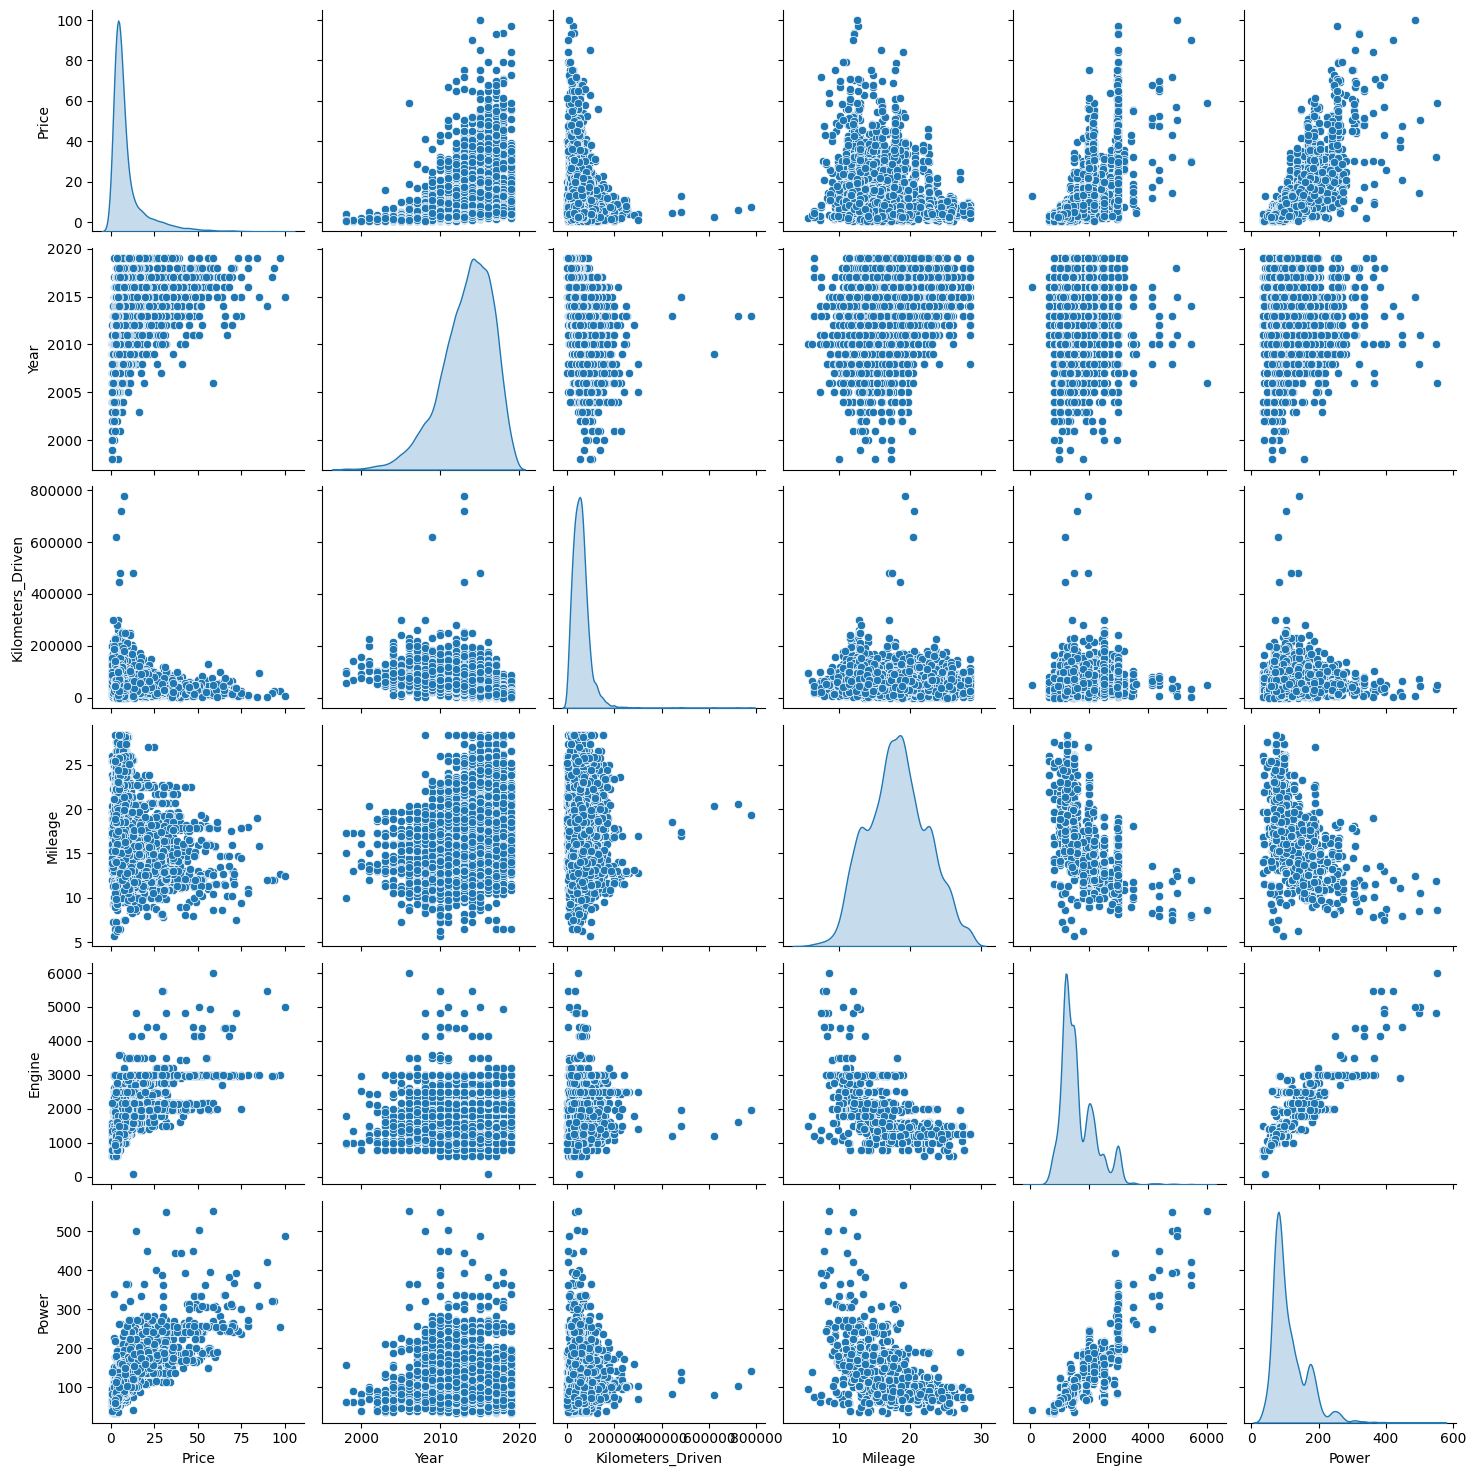

In [113]:
sns.pairplot(df[['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']], diag_kind='kde')

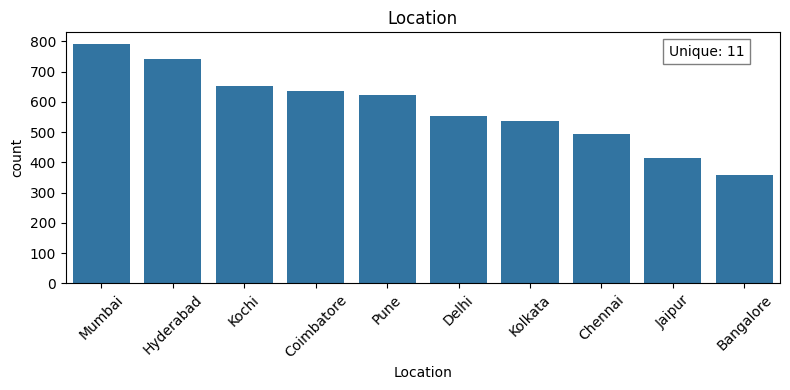

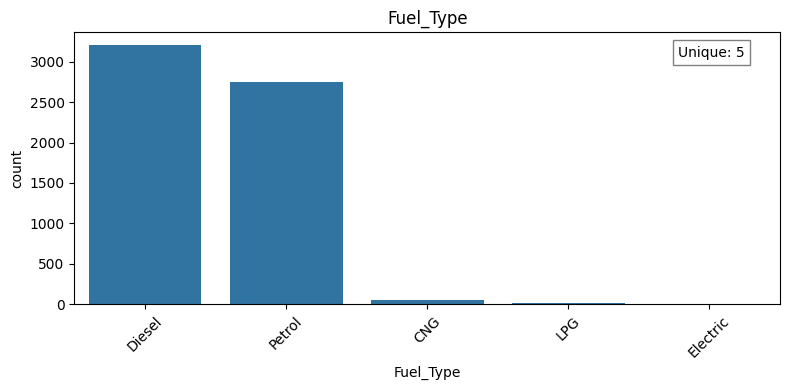

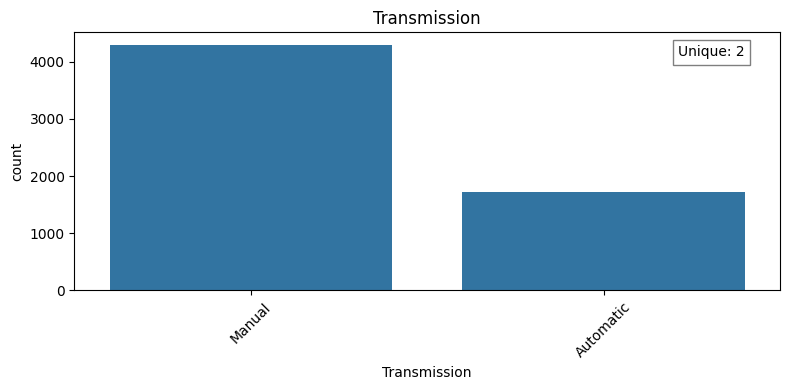

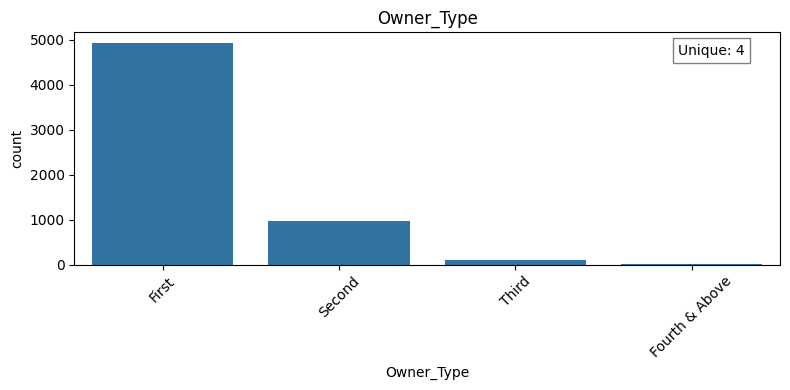

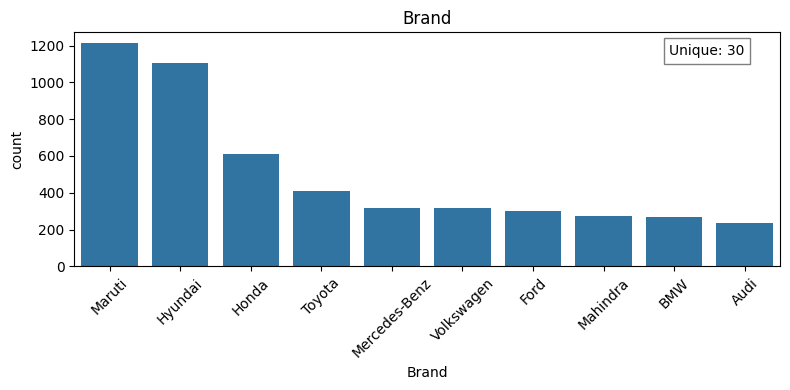

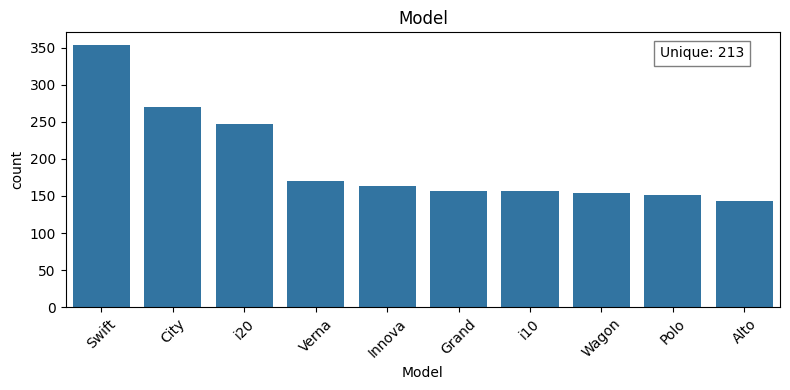

In [114]:
def univariable_categorical(df):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    # Plot Bar plots for categorical features (top 10 categories)
    for col in cat_cols:
        # Get top 10 categories
        top_10 = df[col].value_counts().nlargest(10)
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=top_10.index)
        plt.title(f'{col}')
        plt.xticks(rotation=45)
        # Annotate No. of unique values with box
        n_unique = df[col].nunique()
        plt.text(0.95, 0.95, f'Unique: {n_unique}', horizontalalignment='right', verticalalignment='top', 
                 transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
        plt.tight_layout()
        plt.show()

univariable_categorical(df)

* `Brand` and `Model` are nominal categorical features with high cardinality.  
   binary encoding
* `Location` is a nominal categorical feature with medium cardinality.
   binary encoding
* `Transmission` is a binary categorical feature.
    one-hot encoding (take care of drop first)
* `Fuel_Type` is a nominal categorical feature with some rare categories.
    one-hot encoding (take care of rare categories)
* `Owner_Type` is an ordinal categorical feature.
   ordinal encoder

# Saving the Cleaned Data

In [115]:
df.to_csv('../data/semi_cleaned_data.csv', index=False)

👉 We need to handle :
* Missing Values.
* Outliers.
* Categorical.